In [1]:
import pandas as pd
import numpy as np

In [4]:
url = ("https://raw.githubusercontent.com/luislemuspaz/Ciencia-de-Datos-en-Python/master/marketing_data.csv")
df = pd.read_csv(url)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
fisttc = df[df["AcceptedCmp1"]==1]
lasttc = df[df["Response"]==1]
print(fisttc.shape, lasttc.shape)

(144, 28) (334, 28)


In [6]:
print(fisttc.mean()[1], lasttc.mean()[1])

1968.5347222222222 1969.4161676646706


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [7]:
print(fisttc.mean()[2], lasttc.mean()[2])

0.09027777777777778 0.3413173652694611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [8]:
print(fisttc.mean()[4], lasttc.mean()[4])

46.979166666666664 35.383233532934135


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [9]:
df.groupby(by = 'Education')["AcceptedCmp1"].sum()

Education
2n Cycle      14
Basic          0
Graduation    82
Master        18
PhD           30
Name: AcceptedCmp1, dtype: int64

In [10]:
df.groupby(by = 'Education')["AcceptedCmp1"].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: AcceptedCmp1, dtype: int64

In [11]:
conversion_by_edu = df.groupby(by = 'Education')["AcceptedCmp1"].sum() / df.groupby(by = 'Education')["AcceptedCmp1"].count()

In [12]:
conversion_by_edu = pd.DataFrame(conversion_by_edu)

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

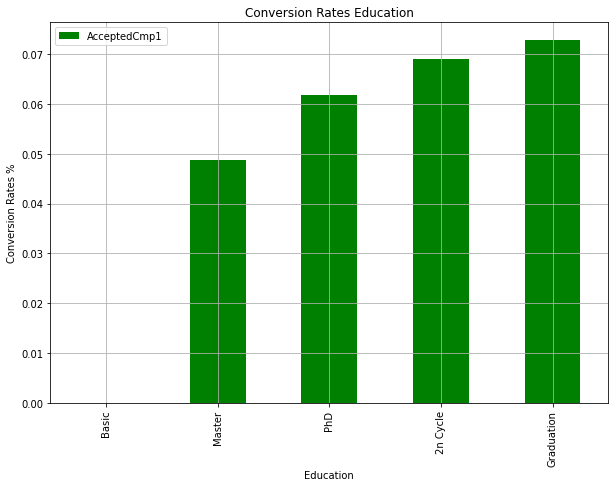

In [14]:
axx = conversion_by_edu.loc[['Basic','Master','PhD','2n Cycle','Graduation']].plot(
    kind = 'bar', color = 'green', grid = True, figsize = (10, 7), title = "Conversion Rates Education"
)
axx.set_xlabel("Education")
axx.set_ylabel("Conversion Rates %")
plt.show

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [22]:
df["Compras Totales"] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 +  df.AcceptedCmp5

In [23]:
df["Engaged"] = df["Compras Totales"].apply(lambda x: 0 if x == 0 else 1)

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Compras Totales,Engaged
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,0,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,1,1
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,...,0,0,0,0,0,0,0,AUS,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,...,1,0,0,0,0,1,0,SP,1,1


In [32]:
continuos_var = ['Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                 'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                 'NumWebVisitsMonth','Complain']

In [25]:
import statsmodels.api as sm

In [33]:
logit = sm.Logit(df['Engaged'], df[continuos_var])

In [34]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.404348
         Iterations 7


In [35]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2225
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2065
Time:                        23:25:18   Log-Likelihood:                -905.74
converged:                       True   LL-Null:                       -1141.4
Covariance Type:            nonrobust   LLR p-value:                 1.116e-91
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Kidhome                -0.2924      0.159     -1.841      0.066      -0.604       0.019
Teenhome               -0.6246      0.139     -4.479      0.000      -0.898      -0.351
Recency                -0.0078      0.002     -3.979      0.000      -0.012      -0.004
MntWines                0.0040      0.000     14.387      0.000       0.003       0.005
MntFruits              -0.0061      0.002     -3.171      0.002      -0.010      -0.002
MntMeatProducts        -0.0003      0.000     -0.938      0.348      -0.001       0.000
MntFishProducts        -0.0020      0.001     -1.426      0.154      -0.005       0.001
MntSweetProducts       -0.0006      0.002     -0.349      0.727      -0.004       0.003
MntGoldProds            0.0019      0.001      1.584      0.113      -0.000       0.004
NumDealsPurchases      -0.0724      0.043     -1.665      0.096      -0.158       0.013
NumWebPurchases         0.0133      0.026      0.518      0.604      -0.037       0.064
NumCatalogPurchases     0.0308      0.029      1.051      0.293      -0.027       0.088
NumStorePurchases      -0.1869      0.023     -7.978      0.000      -0.233      -0.141
NumWebVisitsMonth      -0.1149      0.027     -4.323      0.000      -0.167      -0.063
Complain               -0.4392      0.804     -0.546      0.585      -2.016       1.137
=======================================================================================
"""

In [38]:
variables = ["Recency",'NumStorePurchases','Teenhome','MntWines']
target = ["Engaged"]

In [39]:
sample_df = df[variables + target]

In [40]:
from sklearn import tree

In [41]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)

In [45]:
dt_model.fit(df[variables], df[target])

DecisionTreeClassifier(max_depth=4)

In [46]:
dot_data = tree.export_graphviz(dt_model, feature_names=variables, class_names = ["0","1"],
                                filled = True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

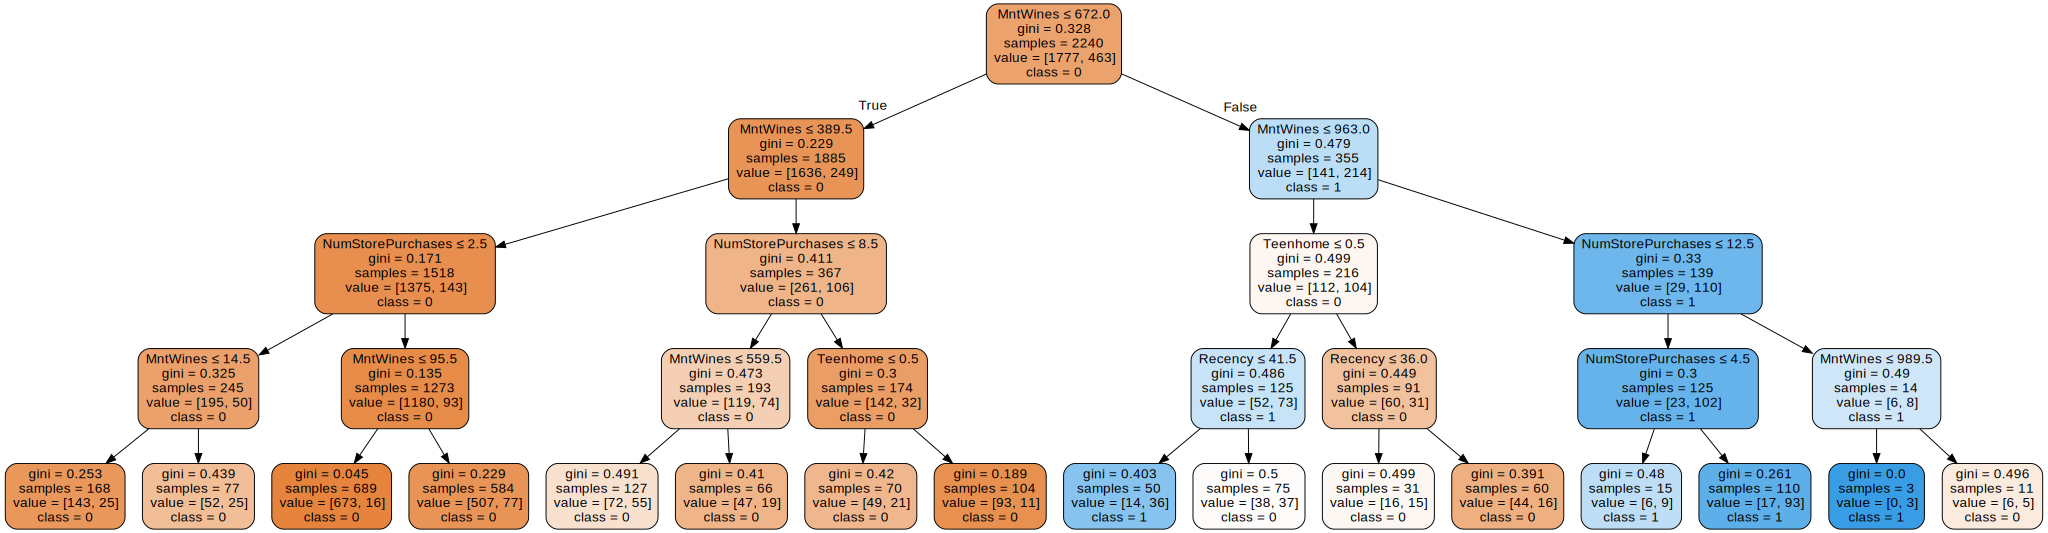

In [47]:
graph